In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

warnings.filterwarnings('ignore')
from plotting_utils import fig_saver, legend_outside
import gas_phase_data
import numpy as np
import apogee_analysis as aah
from vice_utils import load_model
from matplotlib import animation

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import sys
sys.path.append("../")
import surp
import multizone_sim
import vice
import pickle
from vice_to_pickle import vice_model, pickle_output
import pandas as pd
from dataclasses import dataclass
import rc_params

In [4]:
def plot_slice(df, x, y, c, t, t_val=0, xlabel=None, ylabel=None, tlabel=None, fig=None, ax=None, xlog=False):
    a = df[t].unique()
    n = len(a)
    
    if xlabel is None:
        xlabel = x
    if ylabel is None:
        ylabel = y

    if fig is None or ax is None:
        fig, ax = plt.subplots()
    
    if xlog:
        x_min = np.log10(df[x].min())
        x_max = np.log10(df[x].max())
    else:
        x_min = df[x].min()
        x_max = df[x].max()
    
    y_min = df[y].min()
    y_max = df[y].max()

    s = a[t_val]
    sample_slice = df[df[t] == s]
    df1 = sample_slice.pivot(values=c, index=y, columns=x)[::-1]
    im = plt.imshow(df1, extent=[x_min, x_max, y_min, y_max], aspect="auto", vmin=0, vmax=df[c].max())

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title("%s = %f" % (tlabel,s))
    
    plt.colorbar()
    plt.tight_layout()
    
    return im


In [5]:


def plot_movie(df, x, y, tlabel=None, savefile=None, dpi=100, **kwargs):
    fig = plt.figure()
    ax = plt.axes(xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))
    line, = ax.plot([], [])
    
    def init():
        line.set_data([], [])
        return line,
    
    def animate(i):
        xt = df.loc[i][x]
        yt = df.loc[i][y]
        
        line.set_data(xt, yt)

        ax.set_title("%s = %f" % (tlabel,s))
        return line,

    
    ani = animation.FuncAnimation(fig, animate, interval=50)

    # converting to an html5 video
    video = ani.to_html5_video()

    # embedding for the video
    html = display.HTML(video)

    # draw the animation
    display.display(html)
    
    if savefile is not None:
        writervideo = animation.FFMpegWriter(fps=20)
        ani.save(savefile, writer=writervideo, dpi=dpi)
    plt.close()

In [6]:
model = vice_model.from_file("pickles/cristallo11_f0.2_Z0.3_eta1_v0.1_lateburst.pickle")

In [7]:
h = model.history

df = h.set_index(["time", "R"]).copy()

In [24]:
model.history.to_csv("cristallo11_f0.2_Z0.3_eta1_v0.1_lateburst.csv")

In [8]:
df.loc[2]

,mgas,mstar,sfr,ifr,ofr,eta_0,r_eff,z_in(fe),z_in(o),z_in(n),...,[c/h],[o/fe],[n/fe],[n/o],[c/fe],[c/o],[c/n],z,[m/h],lookback
R,,,,,,,,,,,,,,,,,,,,,
0.0,7.940733e+06,1920547.0,0.007866,0.008151,0.000274,0.034885,0.265423,0.0,0.0,0.0,...,0.288670,0.377933,0.014764,-0.363169,0.383255,0.005322,0.368491,0.023911,0.232475,11.2
0.1,2.281906e+07,8474704.0,0.022606,0.022881,0.001055,0.046689,0.289953,0.0,0.0,0.0,...,0.299490,0.335840,0.024795,-0.311045,0.351256,0.015415,0.326461,0.024351,0.240389,11.2
0.2,3.643092e+07,17686560.0,0.036090,0.037334,0.002119,0.058711,0.294707,0.0,0.0,0.0,...,0.311194,0.294777,0.035747,-0.259031,0.321695,0.026918,0.285949,0.024811,0.248519,11.2
0.3,4.885735e+07,29747890.0,0.048400,0.049385,0.003434,0.070958,0.312520,0.0,0.0,0.0,...,0.317888,0.264657,0.047504,-0.217153,0.298341,0.033683,0.250836,0.025142,0.254265,11.2
0.4,6.017469e+07,44072860.0,0.059612,0.059427,0.004974,0.083432,0.355503,0.0,0.0,0.0,...,0.322071,0.252806,0.037633,-0.215173,0.293056,0.040250,0.255424,0.025164,0.254655,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.5,1.000000e-12,0.0,0.000000,0.000000,0.000000,22.451290,NaN,0.0,0.0,0.0,...,-inf,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,11.2
19.6,1.000000e-12,0.0,0.000000,0.000000,0.000000,22.879850,NaN,0.0,0.0,0.0,...,-inf,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,11.2
19.7,1.000000e-12,0.0,0.000000,0.000000,0.000000,23.316370,NaN,0.0,0.0,0.0,...,-inf,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,11.2


RuntimeError: Requested MovieWriter (ffmpeg) not available

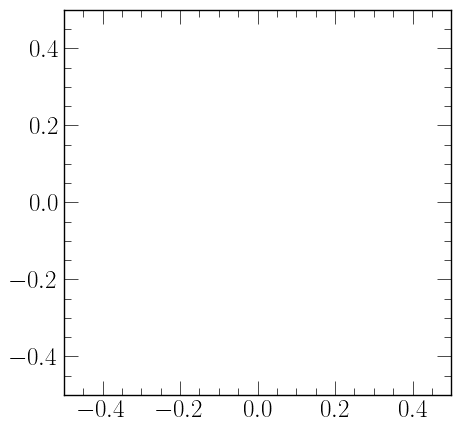

In [10]:
plot_movie(h, "[o/h]", "[c/o]", "formation_time")

In [20]:
!cat ~/.bashrc

# .bashrc

# Source global definitions
if [ -f /etc/bashrc ]; then
	. /etc/bashrc
fi

# User specific aliases and functions


export PATH=$PATH:$HOME/local/src/ffmpeg-git-20220910-amd64-static/


In [21]:
!export PATH=$PATH:$HOME/local/src/ffmpeg-git-20220910-amd64-static/

In [23]:
!echo $PATH

/apps/project/ondemand/app_jupyter/3.0.17/bin:/apps/xalt/xalt/bin:/apps/git/2.18.0/share/man:/apps/git/2.18.0/bin:/apps/nodejs/14.17.3/bin:/apps/texlive/2018/bin/x86_64-linux:/apps/cuda/9.0.176/usr/bin:/apps/cuda/9.0.176/bin:/apps/software_usage:/usr/lib64/qt-3.3/bin:/opt/osc/bin:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/ibutils/bin:/opt/puppetlabs/bin
